$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge Nº4 | Métodos de Ensamble}$$


_Integrantes:_

* _José Cebrián Baca_

* _Ana Lucia Manrique De La Torre_

* _Willy Valdivia_

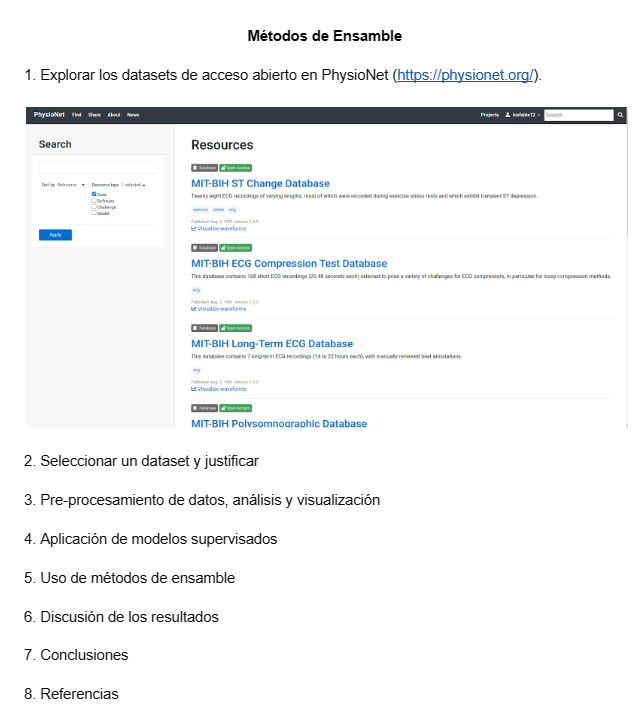

##Justificación del dataset usado en el challenge:


Para el desarrollo del challenge 4, se selecciono un conjunto de datos presentados en el desafío PhysioNet/Computing in Cardiology Challenge 2019 el cual tenía como objetivo principal la detección temprana de la sepsis a partir de datos clínicos fisiológicos en pacientes de la UCI de tres sistemas hospitalarios separados. Para entender el contexto de este challenge, es necesario definir esta afección. La sepsis se define como una condición que puede ser fatal y que se produce cuando la reacción del cuerpo a una infección causa daño a los tejidos y ocasiona una falla orgánica que incluso puede conducir a la muerte [1]. De este modo, la sepsis se convierte en una afección sumamente peligrosa, al ver como en hospitales de EE. UU el manejo de sepsis cuesta alrededor de $ 24 mil millones por no detectar la sepsis en un momento temprano de la afección [2]. Al definir la importancia de detectar esta enfermedad a tiempo, se decidió utilizar estos datos porque incluyen mediciones fisiológicas continuas y otras variables clínicas relevantes para el problema descrito. Además, estos datos fueron recopilados en una población real de pacientes de la UCI, lo que los hace representativos de la población objetivo [3]. Además, la cantidad de datos es significativa, con más de 10,000 registros de pacientes disponibles para su análisis. En síntesis, los datos del desafío PhysioNet/Computing in Cardiology Challenge 2019 representa una excelente opción para aplicar modelos de aprendizaje supervisado, ya que el problema abordado por el desafío es un problema relevante en el campo de la salud. Además que, la data recopilada tiene altos estándares en calidad, cantidad y accesibilidad.

# Data reading from PhysioNet

Se obtuvo la data desde la pagina de Physionet.

In [ ]:
!wget -r -N -c -np https://physionet.org/files/challenge-2019/1.0.0/training/

Se han truncado las últimas 5000 líneas del flujo de salida.
Saving to: ‘physionet.org/files/challenge-2019/1.0.0/training/training_setA/p001757.psv’

physionet.org/files 100%[===================>]   4.09K  --.-KB/s    in 0s      

2023-05-07 21:39:26 (885 MB/s) - ‘physionet.org/files/challenge-2019/1.0.0/training/training_setA/p001757.psv’ saved [4192/4192]

--2023-05-07 21:39:26--  https://physionet.org/files/challenge-2019/1.0.0/training/training_setA/p001758.psv
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 8019 (7.8K) [text/plain]
Saving to: ‘physionet.org/files/challenge-2019/1.0.0/training/training_setA/p001758.psv’

physionet.org/files 100%[===================>]   7.83K  --.-KB/s    in 0s      

2023-05-07 21:39:26 (1.49 GB/s) - ‘physionet.org/files/challenge-2019/1.0.0/training/training_setA/p001758.psv’ saved [8019/8019]

--2023-05-07 21:39:26--  https://physionet.org/files/challenge-2019/1.0.0/training/training_setA/

Se importaron la slibrerias necesarias

In [ ]:
import numpy as np 
import pandas as pd 
import os

Se realizo la elaboración de una función para leer los datos PSV del directorio de origen

In [ ]:
def read_data(filepath,data table):
    "Reusable function to read PSV data from source directory"
    count = 0
    rows = 0
    for filename in os.listdir(filepath):
        if filename.endswith(".psv"): 
            with open(filepath + filename) as openfile:
                patient = filename.split("p")[1]
                patient = patient.split(".")[0]

                file = pd.read_csv(openfile,sep = "|")
                file['Patient_ID'] = patient
                
                file = file.reset_index()
                file = file.rename(columns={"index": "Hour"})
                
                datatable = pd.concat([datatable, file], ignore_index=True)
                
                rows += file.size
                count += 1
        # Print progress after 10k files
        if count % 10000 == 0:
            print("Progress || Files: {} || Number of items: {}".format(count,rows))
    print("Done ||| Files: {} || Number of items: {}".format(count,rows))
    return(datatable)

Debio a que la data esta en diferentes archivos, se vió por conveniente unirlas en un mismo dataframe.

In [ ]:
basepath = "/content/physionet.org/files/challenge-2019/1.0.0/training/training_setA/"
basepath2 = "/content/physionet.org/files/challenge-2019/1.0.0/training/training_setB/"

df = pd.DataFrame()
data = read_data(basepath,df)
data = read_data(basepath2,data)

El dataframe obtenido se guardo en un archivo '.csv', el cual posteriormente se subió a Google Drive.

In [ ]:
data.to_csv("Dataset.csv")

Se descargó la data desde Google Drive

In [ ]:
!gdown 160q2nFVCozHTYpaRH3RT8l242Ps_b5F1

Downloading...
From: https://drive.google.com/uc?id=160q2nFVCozHTYpaRH3RT8l242Ps_b5F1
To: /content/Dataset.csv
100% 161M/161M [00:01<00:00, 81.0MB/s]


## Análisis exploratorio de datos (EDA):

In [ ]:
df = pd.read_csv("Dataset.csv", index_col=[0])
df

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,84.96,0,NaN,NaN,-0.03,1,0,16625
1,1,96.0,100.0,NaN,118.0,91.0,62.0,NaN,NaN,NaN,...,NaN,NaN,84.96,0,NaN,NaN,-0.03,2,0,16625
2,2,60.0,100.0,NaN,92.0,75.0,47.0,NaN,NaN,NaN,...,NaN,NaN,84.96,0,NaN,NaN,-0.03,3,0,16625
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,...,NaN,NaN,84.96,0,NaN,NaN,-0.03,4,0,16625
4,4,59.0,100.0,36.56,82.0,69.0,43.0,16.0,NaN,NaN,...,NaN,NaN,84.96,0,NaN,NaN,-0.03,5,0,16625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,50,37.0,99.0,36.10,129.0,99.0,78.0,21.0,NaN,NaN,...,NaN,NaN,70.00,1,1.0,0.0,-8.44,51,0,107236
1552206,51,37.0,99.0,NaN,147.0,102.0,71.0,22.0,NaN,NaN,...,NaN,NaN,70.00,1,1.0,0.0,-8.44,52,0,107236
1552207,52,41.0,99.0,NaN,142.0,100.0,71.0,17.0,NaN,NaN,...,NaN,NaN,70.00,1,1.0,0.0,-8.44,53,0,107236
1552208,53,36.0,99.0,NaN,135.0,102.0,79.0,19.0,NaN,NaN,...,NaN,NaN,70.00,1,1.0,0.0,-8.44,54,0,107236


In [ ]:
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552210 entries, 0 to 1552209
Data columns (total 43 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Hour              1552210 non-null  int64  
 1   HR                1398811 non-null  float64
 2   O2Sat             1349474 non-null  float64
 3   Temp              525226 non-null   float64
 4   SBP               1325945 non-null  float64
 5   MAP               1358940 non-null  float64
 6   DBP               1065656 non-null  float64
 7   Resp              1313875 non-null  float64
 8   EtCO2             57636 non-null    float64
 9   BaseExcess        84145 non-null    float64
 10  HCO3              65028 non-null    float64
 11  FiO2              129365 non-null   float64
 12  pH                107573 non-null   float64
 13  PaCO2             86301 non-null    float64
 14  SaO2              53561 non-null    float64
 15  AST               25183 non-null    float64
 16  

In [ ]:
df.describe()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.552210e+06,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,84145.000000,...,10242.000000,92209.000000,1.552210e+06,1.552210e+06,940250.000000,940250.000000,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,2.549274e+01,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,-0.689919,...,287.385706,196.013911,6.200947e+01,5.592690e-01,0.496571,0.503429,-5.612512e+01,2.699499e+01,1.798468e-02,5.920148e+04
std,2.888256e+01,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,4.294297,...,153.002908,103.635366,1.638622e+01,4.964749e-01,0.499989,0.499989,1.622569e+02,2.900542e+01,1.328956e-01,5.024819e+04
min,0.000000e+00,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,-32.000000,...,34.000000,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,-3.000000,...,184.000000,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00,9.990000e+03
50%,1.900000e+01,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,0.000000,...,250.000000,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00,1.996500e+04
75%,3.300000e+01,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,1.000000,...,349.000000,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,1.098780e+05
max,3.350000e+02,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,100.000000,...,1760.000000,2322.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00,1.200000e+05


Se visualiza cuantos pacientes hay en el dataset escogido.

In [ ]:
patients = list(df['Patient_ID'].unique())
len(patients)

40336

# Preprocesamiento de datos

Se calcula el porcentaje de valores nulos en cada columna del DataFrame.

In [ ]:
(df.isnull().mean()*100).sort_values(ascending=False)

Bilirubin_direct    99.807371
Fibrinogen          99.340167
TroponinI           99.047745
Bilirubin_total     98.509158
Alkalinephos        98.393194
AST                 98.377604
Lactate             97.329872
PTT                 97.055875
SaO2                96.549372
EtCO2               96.286843
Phosphate           95.986303
HCO3                95.810618
Chloride            95.460279
BaseExcess          94.579020
PaCO2               94.440121
Calcium             94.116067
Platelets           94.059502
Creatinine          93.904433
Magnesium           93.689578
WBC                 93.593199
BUN                 93.134434
pH                  93.069688
Hgb                 92.617558
FiO2                91.665754
Hct                 91.145979
Potassium           90.689082
Glucose             82.894325
Temp                66.162697
Unit1               39.425078
Unit2               39.425078
DBP                 31.345887
Resp                15.354559
SBP                 14.576958
O2Sat     

Basándonos en el paper dado en la pagina web [3], consideramos que era conveniente eliminar ciertos datos fisiológicos recogidos por el conjunto de datos, ya que resultaban redundantes o poco accesibles (como se reflejaba en la cantidad de valores nulos previamente observada).

In [ ]:
columns_drop={'SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
'Phosphate','Potassium','PTT','Fibrinogen', 'Unit1', 'Unit2'}
df = df.drop(columns=columns_drop)
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID'],
      dtype='object')

Se calcula la matriz de correlacion para ver el comportameinto de las variables.

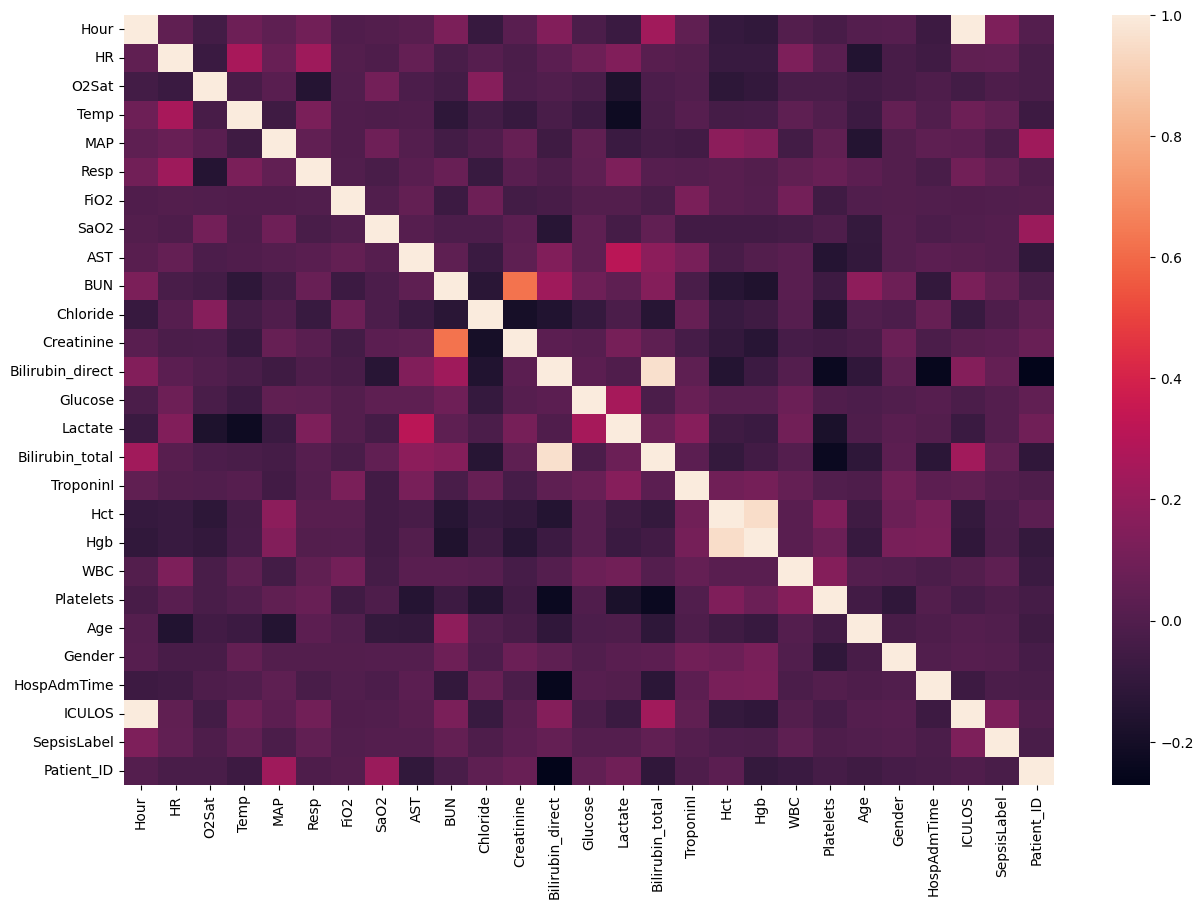

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr)
plt.show()

Se realiza la interpolación de los valores faltantes en el dataFrame para cada grupo de pacientes, rellenando los valores hacia atrás y hacia adelante, y se devuelve el resultado interpolado en un nuevo DataFrame

In [ ]:
df_impute = df.copy()
grouped_by_patient = df_impute.groupby('Patient_ID', group_keys = True)
df_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())
df_impute

Hour     HR  O2Sat   Temp    MAP  Resp  FiO2  SaO2   AST  \
Patient_ID                                                                    
1          564672     0   97.0   95.0  36.11  75.33  19.0  0.28  88.0  16.0   
           564673     1   97.0   95.0  36.11  75.33  19.0  0.28  88.0  16.0   
           564674     2   89.0   99.0  36.11  86.00  22.0  0.28  88.0  16.0   
           564675     3   90.0   95.0  36.11  91.33  30.0  0.28  88.0  16.0   
           564676     4  103.0   88.5  36.11  91.33  24.5  0.28  88.0  16.0   
...                 ...    ...    ...    ...    ...   ...   ...   ...   ...   
120000     959010    30   80.0   96.0  36.60  87.00  15.0   NaN   NaN  18.0   
           959011    31   74.0   97.0  36.60  83.00  15.0   NaN   NaN  18.0   
           959012    32   78.0   98.0  36.60  83.00  15.0   NaN   NaN  18.0   
           959013    33   82.0   99.0  36.60  91.00  16.0   NaN   NaN  18.0   
           959014    34   80.0   97.0  36.60  97.00  15.0   NaN   NaN  18.0   

                    BUN  ...   Hct   Hgb  WBC  Platelets    Age  Gender  \
Patient_ID               ...                                              
1          564672  14.0  ...  37.2  12.5  5.7      317.0  83.14       0   
           564673  14.0  ...  37.2  12.5  5.7      317.0  83.14       0   
           564674  14.0  ...  37.2  12.5  5.7      317.0  83.14       0   
           564675  14.0  ...  37.2  12.5  5.7      317.0  83.14       0   
           564676  14.0  ...  37.2  12.5  5.7      317.0  83.14       0   
...                 ...  ...   ...   ...  ...        ...    ...     ...   
120000     959010  11.0  ...  37.1  11.6  5.4      216.0  62.00       0   
           959011  11.0  ...  37.1  11.6  5.4      216.0  62.00       0   
           959012  11.0  ...  37.1  11.6  5.4      216.0  62.00       0   
           959013  11.0  ...  37.1  11.6  5.4      216.0  62.00       0   
           959014  11.0  ...  37.1  11.6  5.4      216.0  62.00       0   

                   HospAdmTime  ICULOS  SepsisLabel  Patient_ID  
Patient_ID                                                       
1          564672        -0.03       1            0           1  
           564673        -0.03       2            0           1  
           564674        -0.03       3            0           1  
           564675        -0.03       4            0           1  
           564676        -0.03       5            0           1  
...                        ...     ...          ...         ...  
120000     959010         0.00      31            0      120000  
           959011         0.00      32            0      120000  
           959012         0.00      33            0      120000  
           959013         0.00      34            0      120000  
           959014         0.00      35            0      120000  

[1552210 rows x 27 columns]

Se mira los porcentajes de valores nulos en cada columna

In [ ]:
(df_impute.isnull().mean()*100).sort_values(ascending=False)

Bilirubin_direct    93.266633
TroponinI           81.905412
Lactate             63.533607
SaO2                62.980589
Bilirubin_total     59.799447
AST                 59.567520
FiO2                50.224390
Chloride            44.905329
WBC                  4.227456
Platelets            4.150598
Hgb                  3.963317
Hct                  3.786472
Creatinine           3.275459
BUN                  3.233583
Glucose              2.708783
Temp                 0.478672
MAP                  0.173817
Resp                 0.128784
O2Sat                0.024095
HR                   0.009148
HospAdmTime          0.000515
SepsisLabel          0.000000
ICULOS               0.000000
Hour                 0.000000
Gender               0.000000
Age                  0.000000
Patient_ID           0.000000
dtype: float64

Se elimina las columnas con alto porcentaje de valores nulos

In [ ]:
null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 
            'Lactate', 'SaO2', 'FiO2', 'Chloride', 'Patient_ID']
df_impute = df_impute.drop(columns=null_col)
df_impute.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Creatinine',
       'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age', 'Gender',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

## Histograma: 

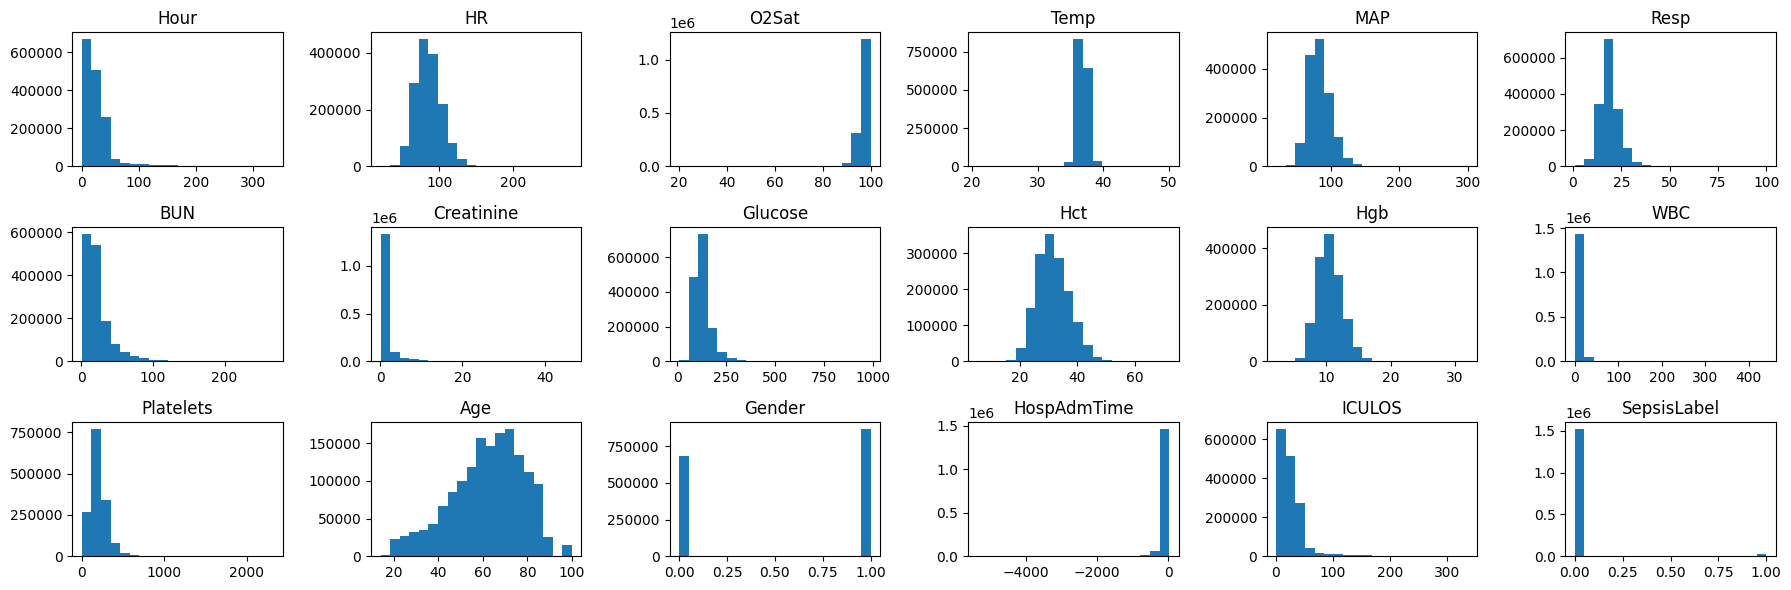

In [ ]:
plt.subplots(nrows=3, ncols=6, figsize=(18, 6))
for i, col in enumerate(df_impute.columns):
  plt.subplot(3,6, i+1)
  plt.hist(df_impute[col], bins=20)
  plt.title(col)
plt.tight_layout()
plt.show()

## Grafico de boxplot:

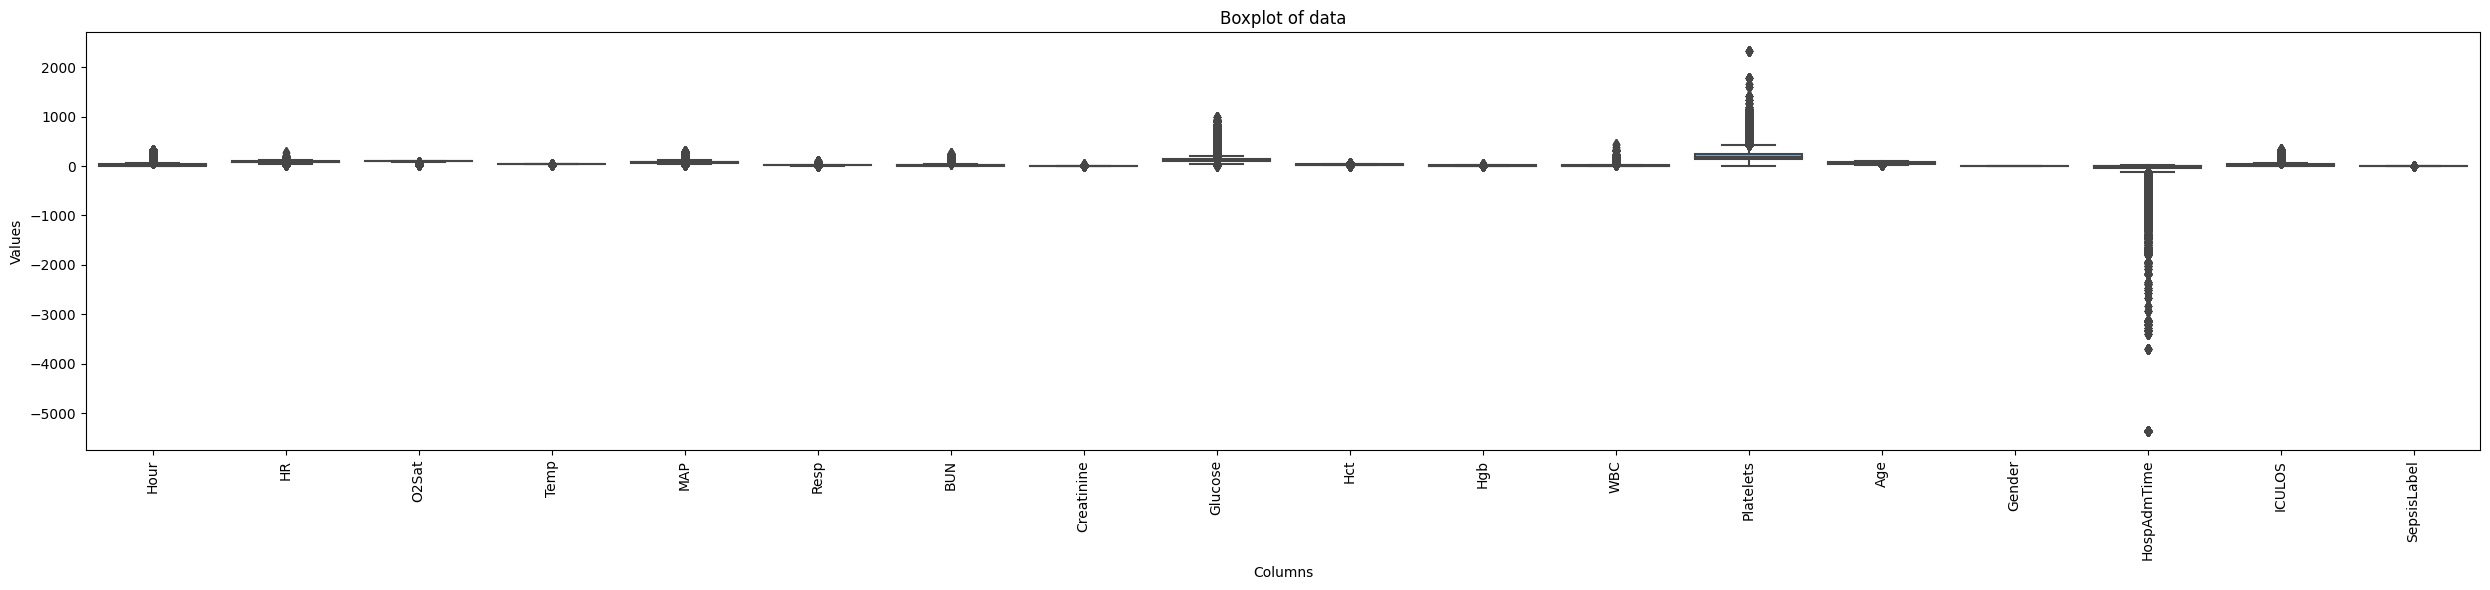

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.boxplot(data=df_impute, ax=ax, orient='v')

ax.set_title("Boxplot of data")
ax.set_xlabel("Columns")
ax.set_ylabel("Values")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Se quitan los valores Nan del dataframe

In [ ]:
df_impute = df_impute.dropna()

In [ ]:
df_impute["SepsisLabel"].value_counts()

0    1444399
1      24930
Name: SepsisLabel, dtype: int64

Se realiza una técnica de remuestreo llamada downsampling (submuestreo) para abordar el desequilibrio de clases en un conjunto de datos, es decir, cuando hay una clase mayoritaria y una minoritaria y la cantidad de datos en una clase es mucho mayor que en la otra.

In [ ]:
from sklearn.utils import resample

# Separamos la clase mayoritaria y minoritaria
majority_class = df_impute[df_impute["SepsisLabel"] == 0]
minority_class = df_impute[df_impute["SepsisLabel"] == 1]

# Hacemos downsampling de la clase mayoritaria
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combinamos las dos clases y mezclamos las filas
df_downsampled = pd.concat([majority_downsampled, minority_class]).sample(frac=1, random_state=42)

In [ ]:
df_downsampled["SepsisLabel"].value_counts()

0    24930
1    24930
Name: SepsisLabel, dtype: int64

## Escalamiento de los datos:

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = df_downsampled.drop("SepsisLabel",axis=1)
y = df_downsampled["SepsisLabel"]
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS
0,-0.324324,-0.500000,0.285714,0.054545,-0.325238,-1.076923,2.05,0.494118,0.553191,-0.729730,-0.52,-0.477612,-0.543307,0.386454,0.0,-0.658045,-0.315789
1,0.621622,0.596154,0.571429,-0.909091,-0.904762,-1.384615,0.10,-0.211765,1.531915,-0.837838,-0.28,-0.029851,-0.039370,0.222665,-1.0,-1.264359,0.605263
2,-0.702703,-0.173077,-0.571429,-0.727273,-0.571429,1.692308,-0.40,-0.341176,0.021277,0.040541,0.08,-0.820896,-0.212598,-0.177069,-1.0,-0.103081,-0.684211
3,0.324324,0.634615,-1.428571,-0.090909,0.000000,0.153846,0.65,-0.211765,0.297872,-1.121622,-1.20,1.253731,-1.015748,0.531208,0.0,-1.894256,0.315789
4,0.108108,0.173077,-1.142857,0.545455,0.476190,0.000000,-0.60,-0.341176,-0.234043,-0.635135,-0.60,-0.074627,2.267717,0.575476,-1.0,0.050399,0.105263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,0.054054,0.365385,0.571429,0.154545,0.142857,-0.461538,-0.40,0.141176,-0.085106,-0.513514,-0.64,-0.149254,-0.338583,-1.018150,0.0,-0.047927,0.052632
49856,-0.432432,1.519231,-0.142857,-0.454545,0.976190,1.000000,-0.65,0.152941,-0.404255,0.743243,0.56,-0.507463,0.700787,-0.664011,-1.0,-0.042792,-0.421053
49857,3.702703,1.096154,0.000000,-0.154545,-0.349048,-1.076923,-0.15,1.788235,0.765957,0.256757,0.24,0.761194,3.070866,-0.203630,-1.0,-7.521491,3.605263
49858,-0.108108,-1.057692,0.285714,-1.109091,-0.047619,-0.769231,-0.35,-0.211765,-0.404255,-0.270270,0.00,0.462687,-0.370079,-1.817176,0.0,0.091289,-0.105263


## Revisualizacion de los datos escalados

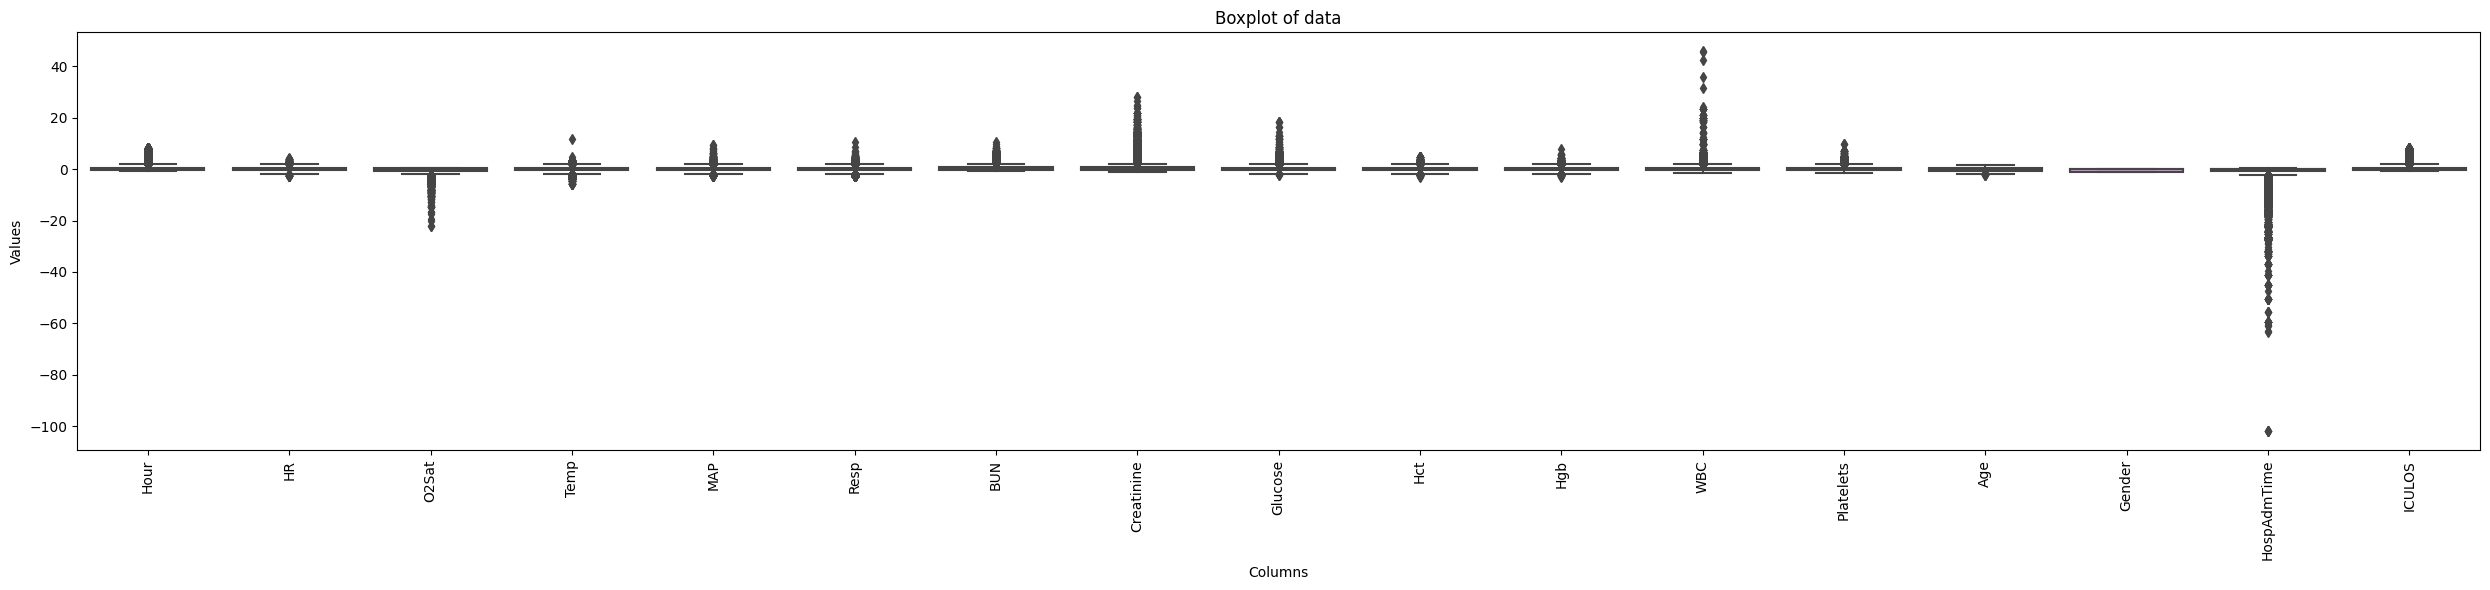

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.boxplot(data=X_scaled, ax=ax, orient='v')

ax.set_title("Boxplot of data")
ax.set_xlabel("Columns")
ax.set_ylabel("Values")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

## Elaboracion del modelo de aprendizaje

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      4927
           1       0.92      0.97      0.94      5045

    accuracy                           0.94      9972
   macro avg       0.94      0.94      0.94      9972
weighted avg       0.94      0.94      0.94      9972
 



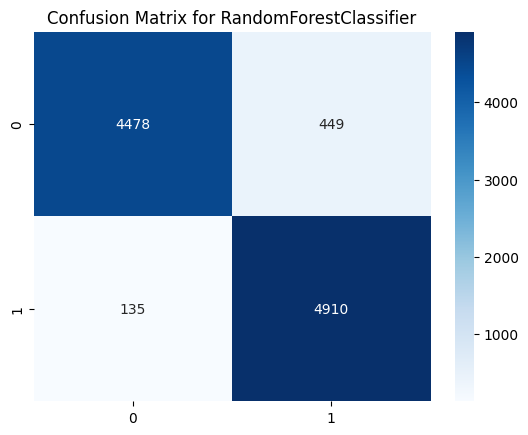


AdaBoostClassifier : 
               precision    recall  f1-score   support

           0       0.71      0.81      0.76      4927
           1       0.78      0.68      0.73      5045

    accuracy                           0.75      9972
   macro avg       0.75      0.75      0.74      9972
weighted avg       0.75      0.75      0.74      9972
 



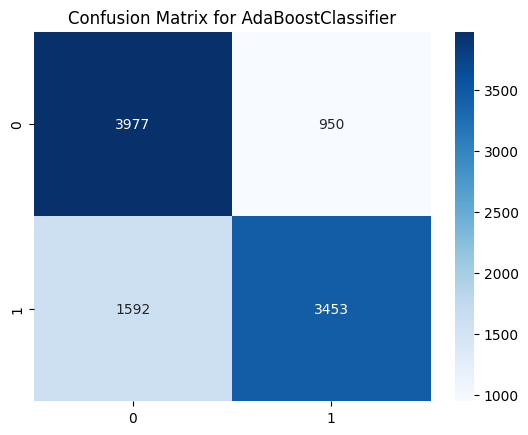


BaggingClassifier : 
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      4927
           1       0.91      0.95      0.93      5045

    accuracy                           0.93      9972
   macro avg       0.93      0.93      0.93      9972
weighted avg       0.93      0.93      0.93      9972
 



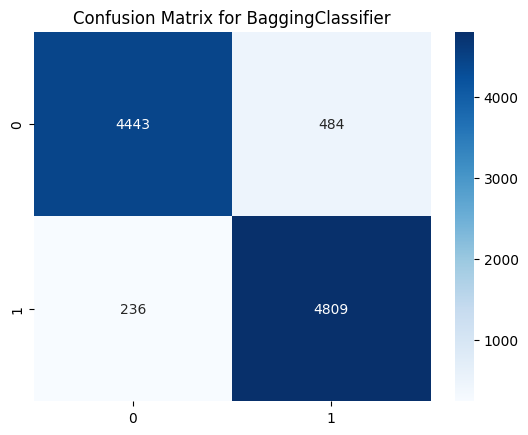


GradientBoostingClassifier : 
               precision    recall  f1-score   support

           0       0.74      0.81      0.77      4927
           1       0.80      0.72      0.75      5045

    accuracy                           0.76      9972
   macro avg       0.77      0.76      0.76      9972
weighted avg       0.77      0.76      0.76      9972
 



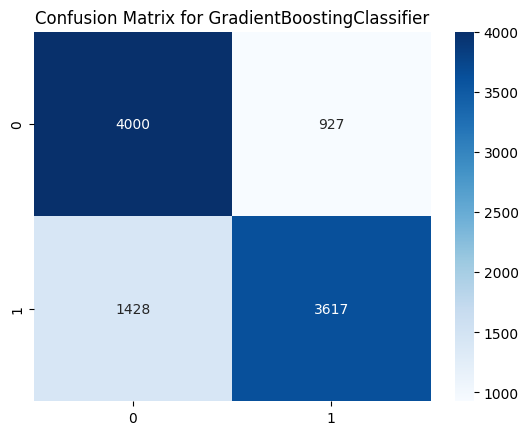


XGBClassifier : 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4927
           1       0.86      0.88      0.87      5045

    accuracy                           0.87      9972
   macro avg       0.87      0.87      0.87      9972
weighted avg       0.87      0.87      0.87      9972
 



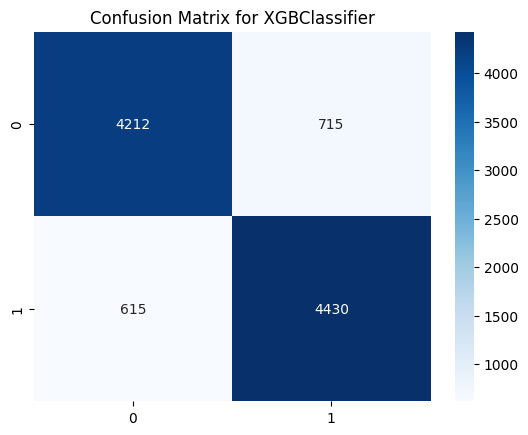


HistGradientBoostingClassifier : 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      4927
           1       0.82      0.80      0.81      5045

    accuracy                           0.81      9972
   macro avg       0.81      0.81      0.81      9972
weighted avg       0.81      0.81      0.81      9972
 



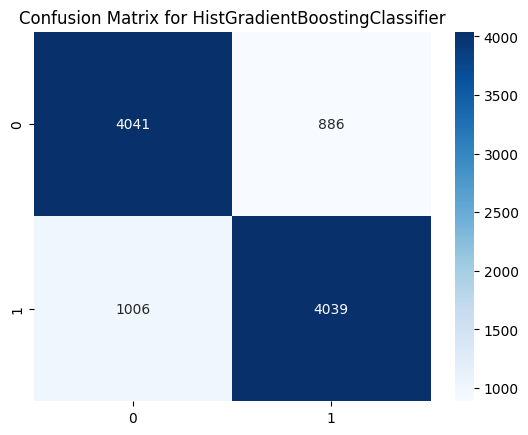

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(mdl,y_true,y_pred):
  print(mdl.__class__.__name__,": \n", classification_report(y_true, y_pred), '\n')
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
  plt.title("Confusion Matrix for "+mdl.__class__.__name__)
  plt.show()
  
models = [RandomForestClassifier(random_state=42),
          AdaBoostClassifier(random_state=42),
          BaggingClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          XGBClassifier(random_state=42),
          HistGradientBoostingClassifier(random_state=42)
          ]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(model, y_test, y_pred)
    print()

Probamos diferentes métodos de ensamblado y obtuvimos un buen rendimiento general en todos los métodos evaluados

## Discusion y conclusiones:

En este análisis, se evaluaron varios métodos de ensamble para clasificar instancias de datos en un conjunto de datos de PhysioNet. Los métodos de ensamble evaluados incluyeron el RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier y HistGradientBoostingClassifier.

Después de la evaluación, se encontró que todos los métodos de ensamble lograron un buen rendimiento en términos de precisión, recall y F1-score. En particular, el RandomForestClassifier obtuvo el mejor rendimiento en términos de precisión y F1-score.

Es importante tener en cuenta que el rendimiento de cada método de ensamble puede variar según el conjunto de datos y las características específicas del problema de clasificación. Por lo tanto, se recomienda realizar evaluaciones adicionales y experimentar con diferentes parámetros para determinar el método de ensamble más efectivo para un problema de clasificación dado.

Además, se puede utilizar la técnica de validación cruzada para obtener una estimación más precisa del rendimiento del modelo. La validación cruzada puede ayudar a detectar la presencia de sobreajuste o subajuste en el modelo y optimizar los parámetros del modelo para obtener una clasificación más precisa.

En conclusión, los resultados de este análisis sugieren que los métodos de ensamble son una técnica efectiva para clasificar instancias de datos en un conjunto de datos de PhysioNet. El RandomForestClassifier obtuvo el mejor rendimiento en términos de precisión y F1-score en este análisis, pero se recomienda realizar evaluaciones adicionales y experimentar con diferentes parámetros para determinar el método de ensamble más efectivo para un problema de clasificación dado.

## Referencias bibliográficas:

[1] M. Singer et al., “The Third International Consensus Definitions for Sepsis and Septic Shock  (Sepsis-3).,” JAMA, vol. 315, no. 8, pp. 801–810, Feb. 2016, doi: 10.1001/jama.2016.0287.

[2] C. J. Paoli, M. A. Reynolds, M. Sinha, M. Gitlin, and E. Crouser, “Epidemiology and Costs of Sepsis in the United States-An Analysis Based on Timing  of Diagnosis and Severity Level.,” Crit. Care Med., vol. 46, no. 12, pp. 1889–1897, Dec. 2018, doi: 10.1097/CCM.0000000000003342.

[3] Phiyodr, “GitHub: Multilabel-oversampling: Many algorithms for imbalanced data support binary and multiclass classification only. This approach is made for mulit-label classification (aka multi-target classification).” https://github.com/phiyodr/multilabel-oversampling (accessed Apr. 30, 2023).